<a href="https://colab.research.google.com/github/saeedgolzar/AML_Course/blob/main/Assignments/ML_HW3/AML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Homework 3

Saeed Golzar
99124048

Spring 2022   
   

---

#Support Vector Machines

##Load Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/1/parkinsons.data"
parkinsons = pd.read_csv(path)

X = parkinsons.drop(['status','name'], axis=1)
y = parkinsons.status

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

##SVM model

###Linear Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

linsvc = SVC(kernel = 'linear')
linsvc.fit(X_train, y_train)

y_pred = linsvc.predict(X_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('Accuracy = ', acc_score)
print('F1-Measure = ', f1_score)

Accuracy =  0.8717948717948718
F1-Measure =  0.9206349206349206


###Poly Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

for d in [2, 3, 4, 5]:
  for r in [1, 2, 3]:

    polysvc = SVC(kernel = 'poly',  gamma=r, degree=d)
    polysvc.fit(X_train, y_train)

    y_pred = polysvc.predict(X_test)

    acc_score = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    print('Poly r =',r,' d =',d)
    print('Accuracy = ', acc_score)
    print('F1-Measure = ', f1_score)
    print('')

Estimate Best Value for parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

polysvc = SVC(kernel = 'poly')
parameters = {'degree':[2, 3, 4, 5], 'gamma': [0.0001, 0.001]}
gsearch = GridSearchCV(polysvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

###Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

for r in [1e-2, 1e-1, 1e0, 1e1]:

  sigsvc = SVC(kernel = 'sigmoid', gamma=r)
  sigsvc.fit(X_train, y_train)

  y_pred = sigsvc.predict(X_test)

  acc_score = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)

  print('Sigmoid r =',r)
  print('Accuracy = ', acc_score)
  print('F1-Measure = ', f1_score)
  print('')

Sigmoid r = 0.01
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858

Sigmoid r = 0.1
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858

Sigmoid r = 1.0
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858

Sigmoid r = 10.0
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858



Estimate Best Value for parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

sigsvc = SVC(kernel = 'sigmoid')
parameters = {'gamma':[5, 6, 7, 8, 9, 10, 11]}
gsearch = GridSearchCV(sigsvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

Best max depth is SVC(coef0=5, degree=7, kernel='poly')


###RBF Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

for gama in [1e-2, 1e-1, 1e0, 1e1]:

  rbfsvc = SVC(kernel = 'rbf', gamma=gama)
  rbfsvc.fit(X_train, y_train)

  y_pred = rbfsvc.predict(X_test)

  acc_score = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)

  print('RBF gama =',gama)
  print('Accuracy = ', acc_score)
  print('F1-Measure = ', f1_score)
  print('')

RBF gama = 0.01
Accuracy =  0.8461538461538461
F1-Measure =  0.909090909090909

RBF gama = 0.1
Accuracy =  0.8461538461538461
F1-Measure =  0.911764705882353

RBF gama = 1.0
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858

RBF gama = 10.0
Accuracy =  0.7948717948717948
F1-Measure =  0.8857142857142858



Estimate Best Value for parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

rbfsvc = SVC(kernel = 'rbf')
parameters = {'gamma':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
gsearch = GridSearchCV(rbfsvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

Best model is SVC(gamma=0.01)


#Ensemble Method

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/2/housing.csv"
housing = pd.read_csv(path)
le = LabelEncoder()
housing['ocean_proximity'] = le.fit_transform(housing.ocean_proximity.values)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(housing)

housing = housing.reset_index()
X = housing.iloc[:,:-3]
y = housing.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


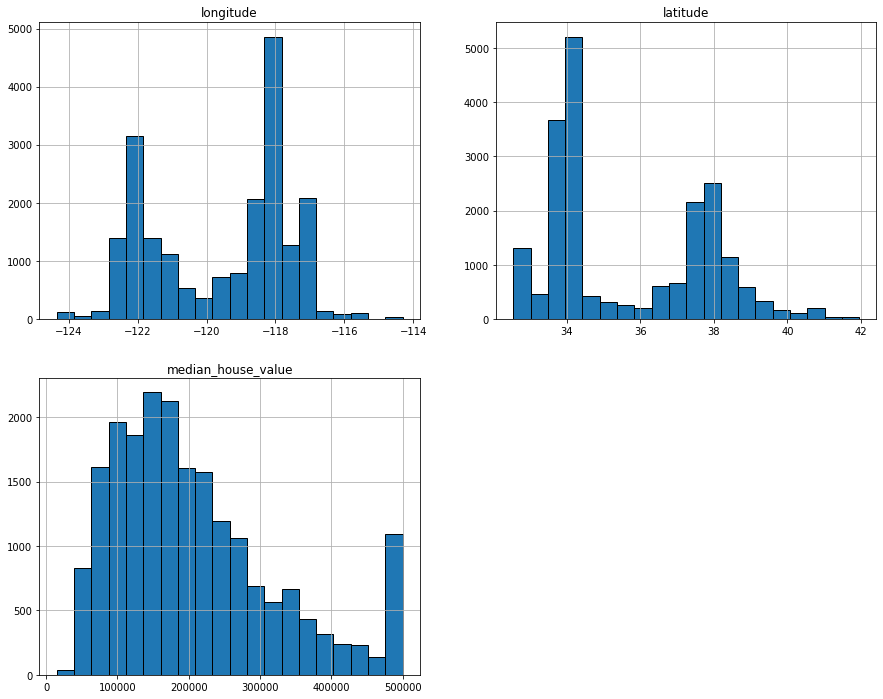

In [ ]:
import matplotlib.pyplot as plt

housing.hist(column=['longitude', 'latitude', 'median_house_value'], figsize=(15, 12), bins=20, edgecolor="black")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig("test.svg")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for depth in [5, 15, 30]:
  for n in [5, 20 , 50]:
    clf = RandomForestRegressor(n_estimators = n, max_depth = depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)

    print('For max depth =', depth, 'Nmber of estimators =', n)
    print('R2 Score=', r2score)
    print('')

For max depth = 5 Nmber of estimators = 5
R2 Score= 0.4546375571181891

For max depth = 5 Nmber of estimators = 20
R2 Score= 0.4484417414798968

For max depth = 5 Nmber of estimators = 50
R2 Score= 0.454992706131757

For max depth = 15 Nmber of estimators = 5
R2 Score= 0.7701777650069661

For max depth = 15 Nmber of estimators = 20
R2 Score= 0.7959887068349238

For max depth = 15 Nmber of estimators = 50
R2 Score= 0.7981529778672978

For max depth = 30 Nmber of estimators = 5
R2 Score= 0.7740925621470476

For max depth = 30 Nmber of estimators = 20
R2 Score= 0.8044856987586216

For max depth = 30 Nmber of estimators = 50
R2 Score= 0.8116413454372394



#Clustering

##Part 1-1 : Clustring Images

###1-1-1 : Flower Image

####Load Libraries

In [92]:
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

####Load Image

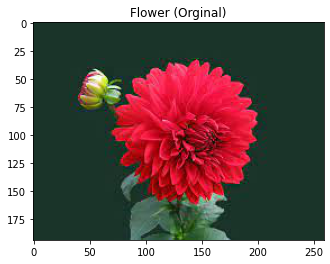

In [116]:
img = io.imread('https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/flower.jpg')
img_shape = img.shape
plt.title('Flower (Orginal)')
plt.imshow(img)
img = img.reshape((img.shape[1]*img.shape[0],3))

####Cluster Image Data

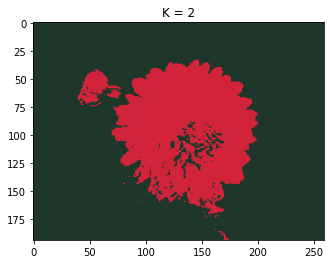

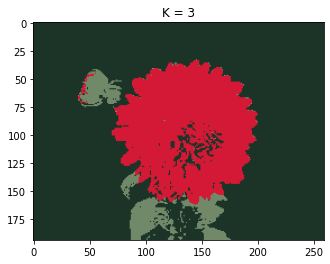

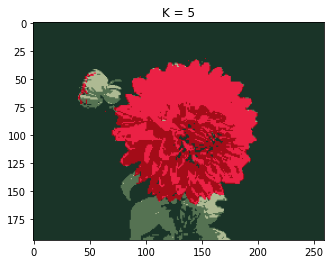

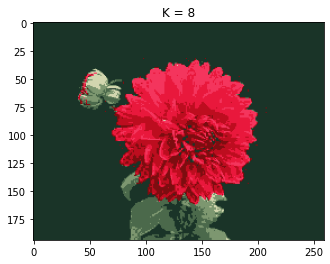

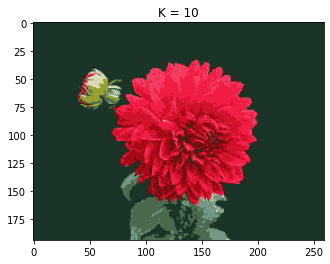

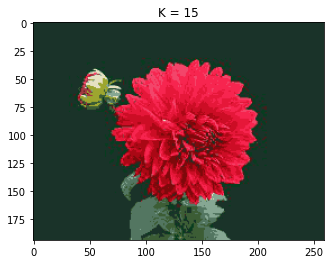

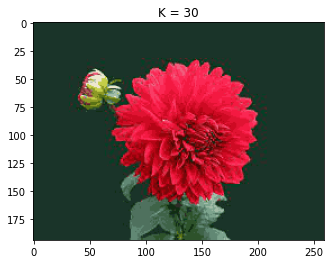

In [117]:
for k in [2, 3, 5, 8, 10, 15, 30]:
  kmeans = KMeans(n_clusters=k)
  clus = kmeans.fit(img)
  centers = np.int_(clus.cluster_centers_)
  segmented_image = centers[clus.labels_.flatten()]
  segmented_image = segmented_image.reshape(img_shape)
  plt.imshow(segmented_image)
  plt.title('K = '+str(k))
  plt.show()

###1-1-2 : Flutterby Image

####Load Image

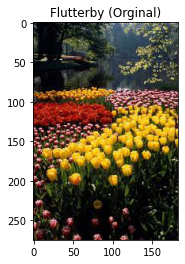

In [110]:
img = io.imread('https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/flutterby.jpg')
img_shape = img.shape
plt.title('Flutterby (Orginal)')
plt.imshow(img)
img = img.reshape((img.shape[1]*img.shape[0],3))

####Cluster Image Data

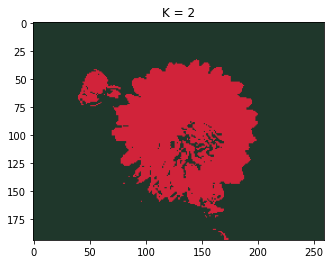

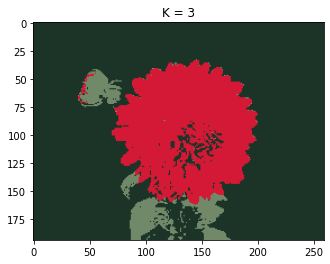

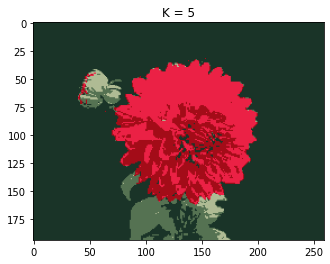

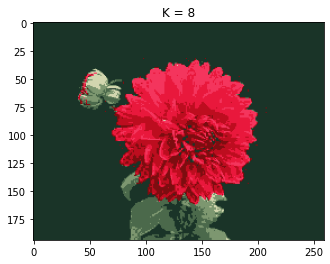

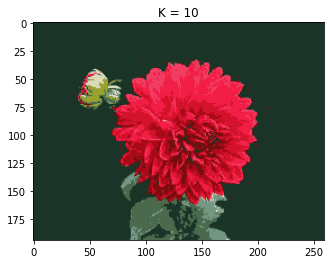

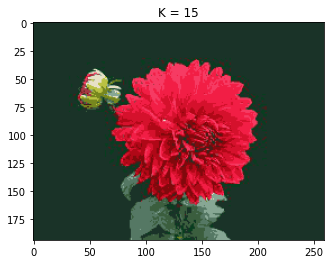

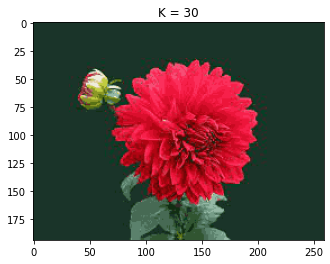

In [118]:
for k in [2, 3, 5, 8, 10, 15, 30]:
  kmeans = KMeans(n_clusters=k)
  clus = kmeans.fit(img)
  centers = np.int_(clus.cluster_centers_)
  segmented_image = centers[clus.labels_.flatten()]
  segmented_image = segmented_image.reshape(img_shape)
  plt.imshow(segmented_image)
  plt.title('K = '+str(k))
  plt.show()

##Part 1-2 : Find Best K by elbow

In [128]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/Shill_Bidding.csv"
shill_bidding = pd.read_csv(path)
shill_bidding = shill_bidding.drop(labels=['Record_ID','Auction_ID','Bidder_ID'],axis=1)
shill_bidding.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


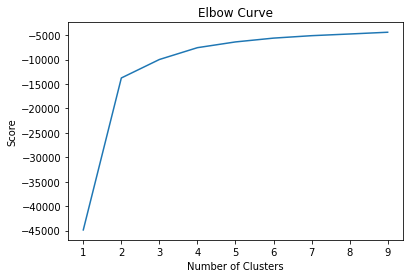

In [176]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(shill_bidding).score(shill_bidding) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow.svg")
plt.show()

##Part 2-1 : Plot 2D Data

###Dataset 1

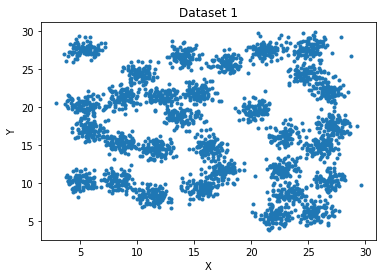

In [143]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset1.csv"
dataset1 = pd.read_csv(path)
#Plot
plt.scatter(dataset1.x, dataset1.y, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1')
plt.savefig("1.svg")
plt.show()

###Dataset 2

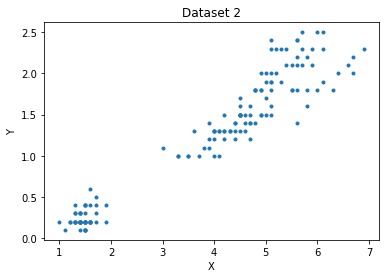

In [144]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset2.csv"
dataset2 = pd.read_csv(path)
#Plot
plt.scatter(dataset2.x, dataset2.y, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2')
plt.savefig("2.svg")
plt.show()

###Dataset 3

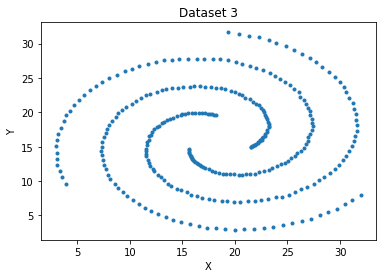

In [145]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset3.csv"
dataset3 = pd.read_csv(path)
#Plot
plt.scatter(dataset3.x, dataset3.y, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 3')
plt.savefig("3.svg")
plt.show()

##Part 2-2 : Compare Clusters

###Dataset 1

####K-means

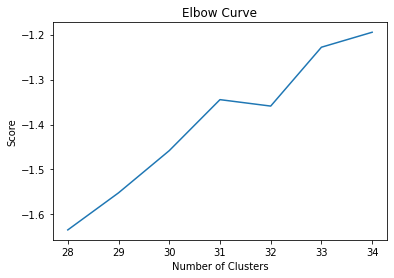

In [253]:
K_clusters = range(28,35)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-31.svg")
plt.show()

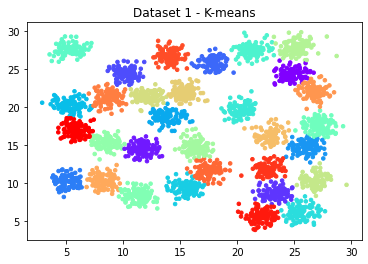

In [254]:
X = dataset1[['x', 'y']].to_numpy()

kmeans = KMeans(n_clusters=31).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 1 - K-means')
plt.savefig("kmean-1.svg")

####BDSCAN

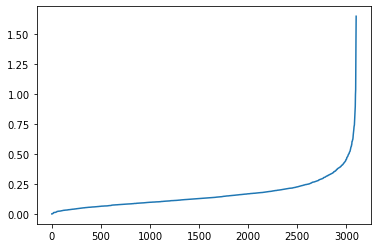

In [255]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

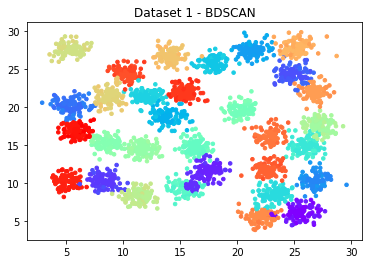

In [256]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.25, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 1 - BDSCAN')
plt.savefig("DBS-1.svg")

####Gaussian Mixture

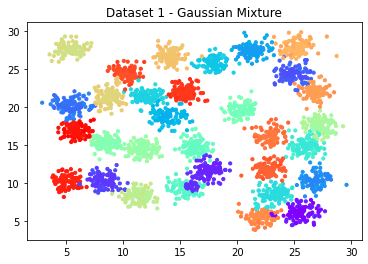

In [257]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture().fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 1 - Gaussian Mixture')
plt.savefig("GMM-1.svg")

###Dataset 2

####K-means

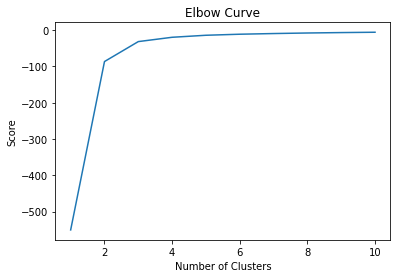

In [258]:
X = dataset2[['x', 'y']].to_numpy()

K_clusters = range(1,11)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-32.svg")
plt.show()

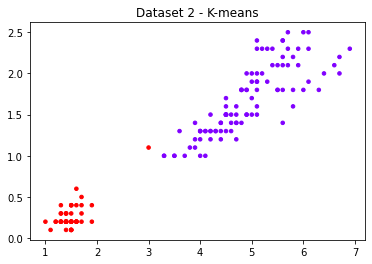

In [259]:
kmeans = KMeans(n_clusters=2).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 2 - K-means')
plt.savefig("kmean-2.svg")

####BDSCAN

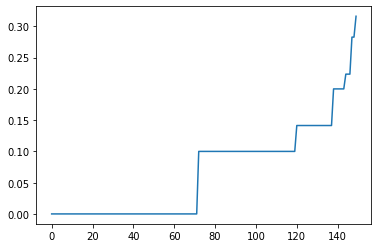

In [260]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

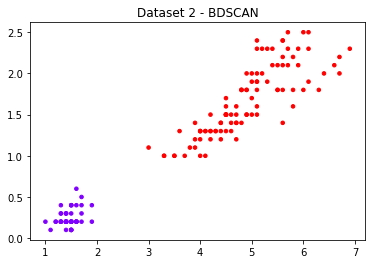

In [261]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.5, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 2 - BDSCAN')
plt.savefig("DBS-2.svg")

####Gaussian Mixture

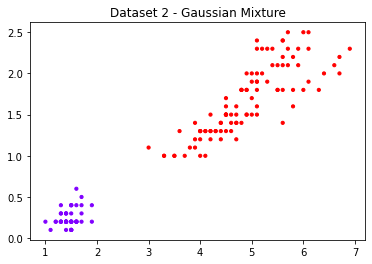

In [262]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture().fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 2 - Gaussian Mixture')
plt.savefig("GMM-2.svg")

###Dataset 3

####K-means

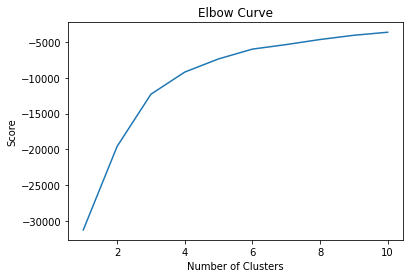

In [263]:
X = dataset3[['x', 'y']].to_numpy()

K_clusters = range(1,11)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-33.svg")
plt.show()

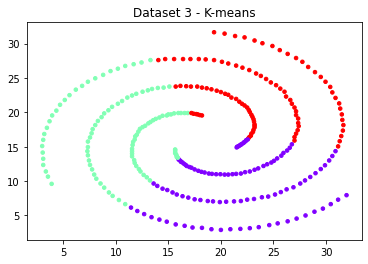

In [264]:
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 3 - K-means')
plt.savefig("kmean-3.svg")

####BDSCAN

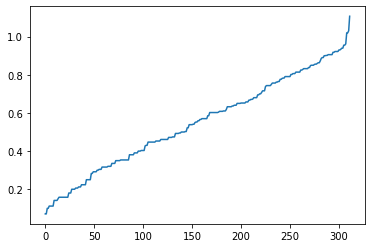

In [265]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

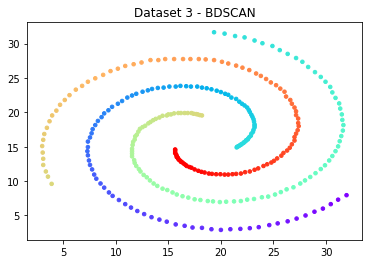

In [266]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.25, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 3 - BDSCAN')
plt.savefig("DBS-3.svg")

####Gaussian Mixture

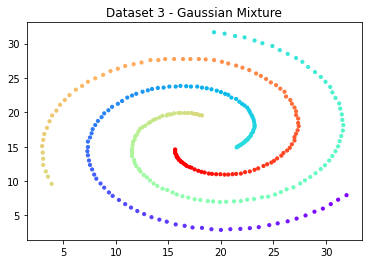

In [267]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture().fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 3 - Gaussian Mixture')
plt.savefig("GMM-3.svg")